In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [41]:
df = pd.read_excel(r"C:\Users\Eric.Englin\DOT OST\volpe-proj-VU16A100 - Emerging Mobility\Subgroup Support\Traveler Information Technologies\Park Typologies + NPS.gov Content\NPS Park List.xlsx")

In [42]:
df.head()

,NPS name,Setting,Recreation Visits (2021),Size (acres),visitation patterns,remove
0,Aniakchak National Monument,rural,145,137176,NaN,NaN
1,Aniakchak National Preserve,rural,145,464117.93,NaN,NaN
2,Alagnak Wild River,rural,262,30664.79,NaN,NaN
3,Rio Grande Wild and Scenic River,rural,275,13123.39,NaN,NaN
4,Yukon-Charley Rivers National Preserve,rural,629,2526512.44,NaN,NaN


In [43]:
kmeans = KMeans(
    init="random",
     n_clusters=8,
     n_init=10,
     max_iter=300,
     random_state=42
)


In [44]:
df.columns

Index(['NPS name', 'Setting', 'Recreation Visits (2021) ', 'Size  (acres)',
       'visitation patterns ', 'remove'],
      dtype='object')

In [45]:
one_hot = pd.get_dummies(df['Setting'])
df = df.drop('Setting',axis = 1)
# Join the encoded df
df = df.join(one_hot)

one_hot = pd.get_dummies(df['visitation patterns '])
df = df.drop('visitation patterns ',axis = 1)
# Join the encoded df
df = df.join(one_hot)



In [46]:
df.head()

,NPS name,Recreation Visits (2021),Size (acres),remove,rural,suburban,urban,1. Sporadic,2. Seasonal,3. Sustained,4. Unclear,Not in Database
0,Aniakchak National Monument,145,137176,NaN,1,0,0,0,0,0,0,0
1,Aniakchak National Preserve,145,464117.93,NaN,1,0,0,0,0,0,0,0
2,Alagnak Wild River,262,30664.79,NaN,1,0,0,0,0,0,0,0
3,Rio Grande Wild and Scenic River,275,13123.39,NaN,1,0,0,0,0,0,0,0
4,Yukon-Charley Rivers National Preserve,629,2526512.44,NaN,1,0,0,0,0,0,0,0


In [47]:
df = df.loc[df['remove']!="Yes"]

In [48]:
df.columns

Index(['NPS name', 'Recreation Visits (2021) ', 'Size  (acres)', 'remove',
       'rural', 'suburban', 'urban', '1. Sporadic', '2. Seasonal',
       '3. Sustained', '4. Unclear', 'Not in Database'],
      dtype='object')

In [49]:
kmeans.fit(df[['Recreation Visits (2021) ', 
       'Size  (acres)', 'rural', 'suburban', 'urban', '1. Sporadic',
       '2. Seasonal', '3. Sustained', '4. Unclear']])

KMeans(init='random', random_state=42)

In [50]:
kmeans.labels_[:5]

array([3, 3, 3, 3, 6])

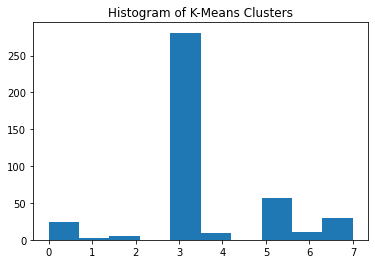

In [53]:
plt.hist(kmeans.labels_)
plt.title("Histogram of K-Means Clusters")
plt.show()

In [62]:
df['cluster'] = kmeans.labels_

In [65]:
df.head()

,NPS name,Recreation Visits (2021),Size (acres),remove,rural,suburban,urban,1. Sporadic,2. Seasonal,3. Sustained,4. Unclear,Not in Database,cluster
0,Aniakchak National Monument,145,137176,NaN,1,0,0,0,0,0,0,0,3
1,Aniakchak National Preserve,145,464117.93,NaN,1,0,0,0,0,0,0,0,3
2,Alagnak Wild River,262,30664.79,NaN,1,0,0,0,0,0,0,0,3
3,Rio Grande Wild and Scenic River,275,13123.39,NaN,1,0,0,0,0,0,0,0,3
4,Yukon-Charley Rivers National Preserve,629,2526512.44,NaN,1,0,0,0,0,0,0,0,6


In [66]:
df.columns

Index(['NPS name', 'Recreation Visits (2021) ', 'Size  (acres)', 'remove',
       'rural', 'suburban', 'urban', '1. Sporadic', '2. Seasonal',
       '3. Sustained', '4. Unclear', 'Not in Database', 'cluster'],
      dtype='object')

In [70]:
len(df)

420

In [73]:
df.to_excel(r"C:\Users\Eric.Englin\DOT OST\volpe-proj-VU16A100 - Emerging Mobility\Subgroup Support\Traveler Information Technologies\Park Typologies + NPS.gov Content\NPS Park cluster results.xlsx")

In [75]:
df['NPS name'][51]

'Ste. Genevieve National Historical Park'

In [76]:
for x in range(len(df)):
    try:
        print(df['NPS name'][x], ": ", df['cluster'][x])
    except: 
        print("error")

Aniakchak National Monument :  3
Aniakchak National Preserve :  3
Alagnak Wild River :  3
Rio Grande Wild and Scenic River :  3
Yukon-Charley Rivers National Preserve :  6
Bering Land Bridge National Preserve :  6
Rainbow Bridge National Monument :  3
Nicodemus National Historic Site :  3
Tuskegee Institute National Historic Site :  3
Sand Creek Massacre National Historic Site :  3
Poverty Point National Monument :  3
Gates of the Arctic National Park :  2
Gates of the Arctic National Preserve :  3
Tuskegee Airmen National Historic Site :  3
Hagerman Fossil Beds National Monument :  3
César E. Chávez National Monument :  3
Fort Bowie National Historic Site :  3
Alibates Flint Quarries National Monument :  3
Saint Croix Island International Historic Site :  3
Fort Union Trading Post National Historic Site :  3
Kobuk Valley National Park :  6
Cape Krusenstern National Monument :  3
Keweenaw National Historical Park :  3
Fort Union National Monument :  3
Noatak National Preserve :  2
Nava